# Supervised Learning - Project

In this Project, we are going to perform a full supervised learning machine learning project on a "Diabetes" dataset. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. 

[Kaggle Dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

# Part I : EDA - Exploratory Data Analysis

For this task, you are required to conduct an exploratory data analysis on the diabetes dataset. You have the freedom to choose the visualizations you want to use, but your analysis should cover the following tasks mostly:

- Are there any missing values in the dataset?
- How are the predictor variables related to the outcome variable?
- What is the correlation between the predictor variables?
- What is the distribution of each predictor variable?
- Are there any outliers in the predictor variables?
- How are the predictor variables related to each other?
- Is there any interaction effect between the predictor variables?
- What is the average age of the individuals in the dataset?
- What is the average glucose level for individuals with diabetes and without diabetes?
- What is the average BMI for individuals with diabetes and without diabetes?
- How does the distribution of the predictor variables differ for individuals with diabetes and without diabetes?
- Are there any differences in the predictor variables between males and females (if gender information is available)?

In [32]:
import pandas as pd

# read csv
ds = pd.read_csv('diabetes.csv')
ds.info()
ds.describe()
# find nulls
null = ds.isnull().sum()
# remove nulls
ds = ds.dropna()
# save to csv
ds.to_csv('diabetes_clean.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


No gender information available.

In [27]:
# read csv
ds = pd.read_csv('diabetes_clean.csv')
ds

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [34]:
# find correlation between predictors and outcome
correlation = ds.corr()
correlation['Outcome'].sort_values(ascending=False)
correlation

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


The closer the number is to -1 or 1, the stronger the correlation between predictors.
The matrix also demonstrates how the variables are related and how they interact with each other. 

Glucose has the strongest relationship with the outcome (0.46).
Skin thickness and BMI have a moderately positive relationship (0.39), pregnancy and age have a strong relationship also (0.54), skin thickness and insulin also have a moderately positive relationship (0.43).

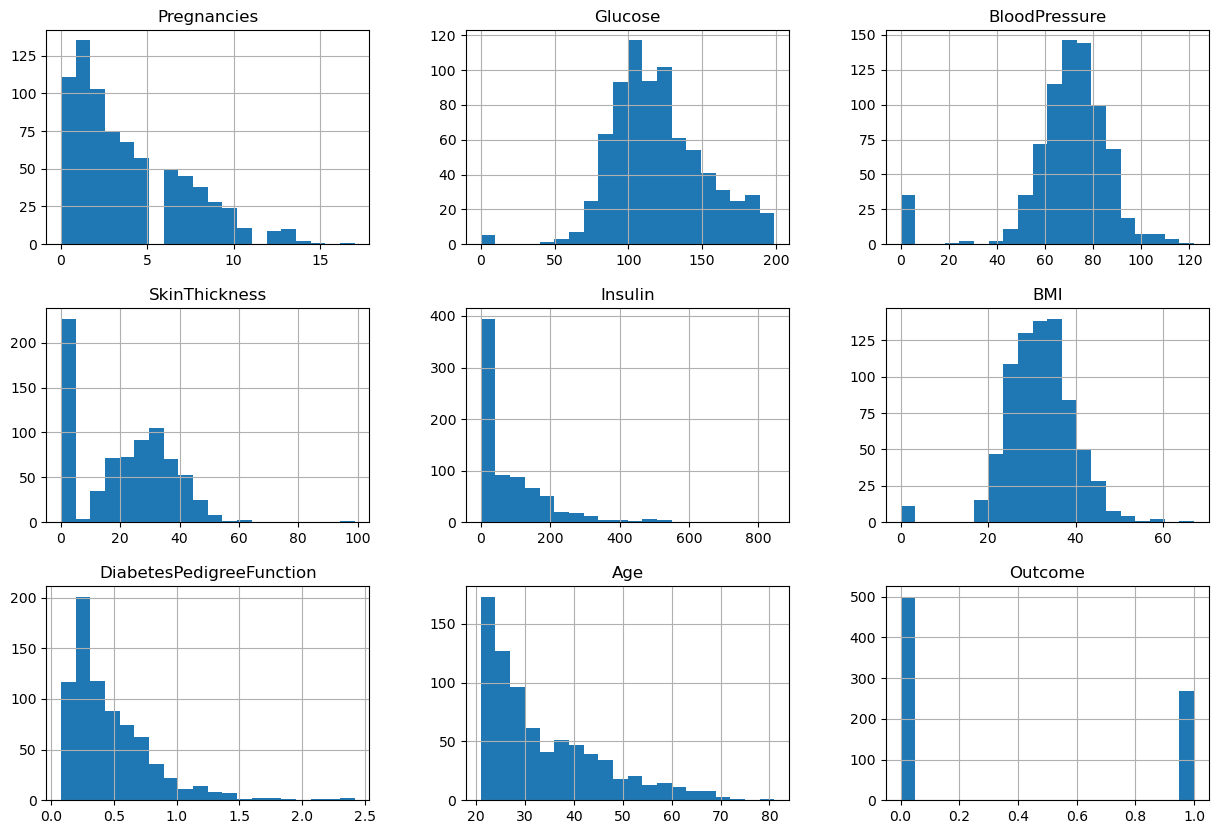

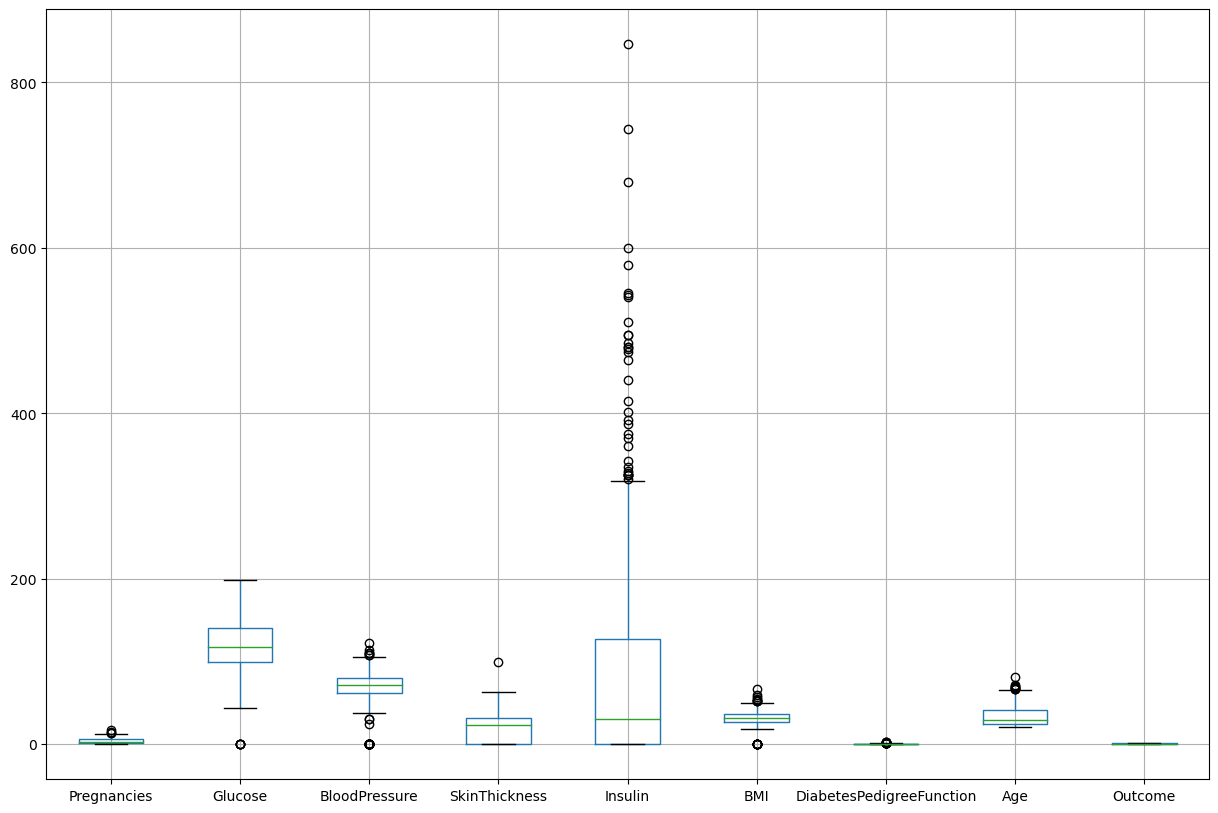

In [43]:
# distribution of predictor variables
import matplotlib.pyplot as plt

# histograms for predictor variable
ds.hist(bins=20, figsize=(15,10))
plt.show()

# outliers of predictor variables
ds.boxplot(figsize=(15,10))
plt.show()

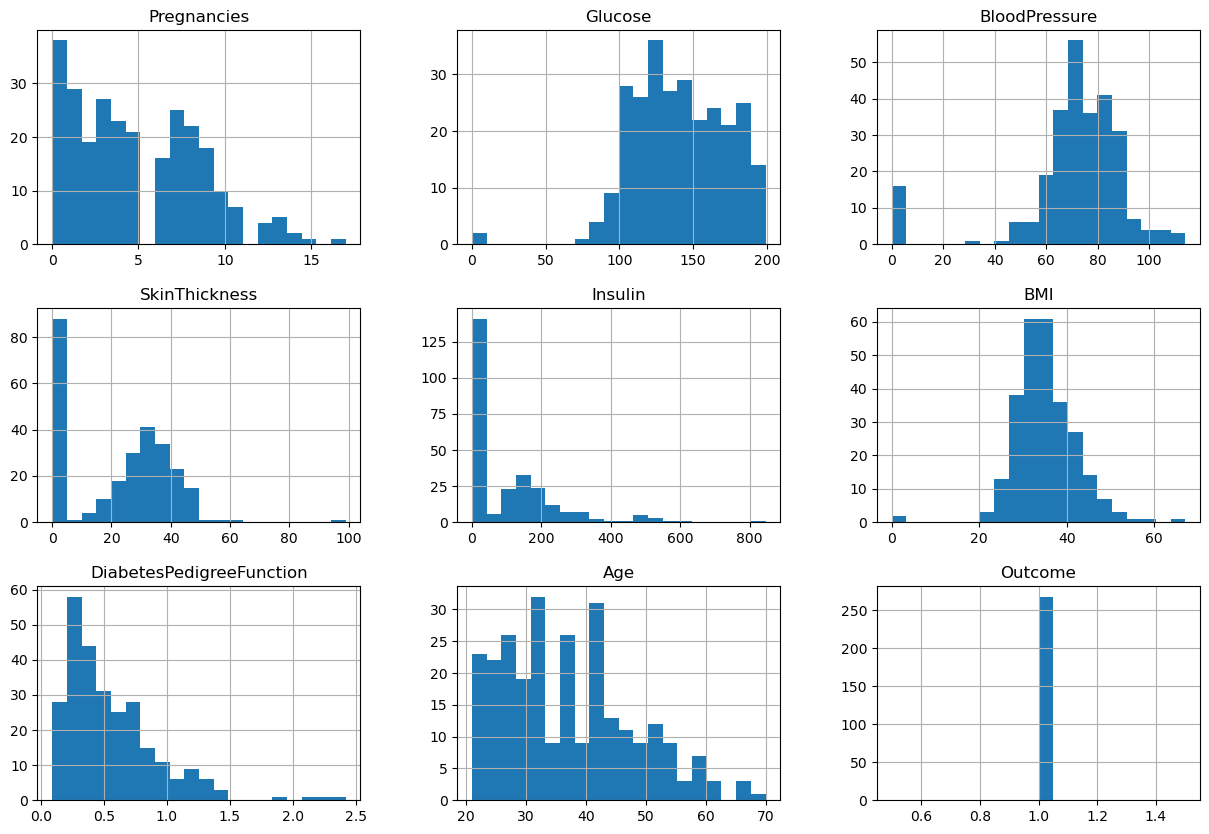

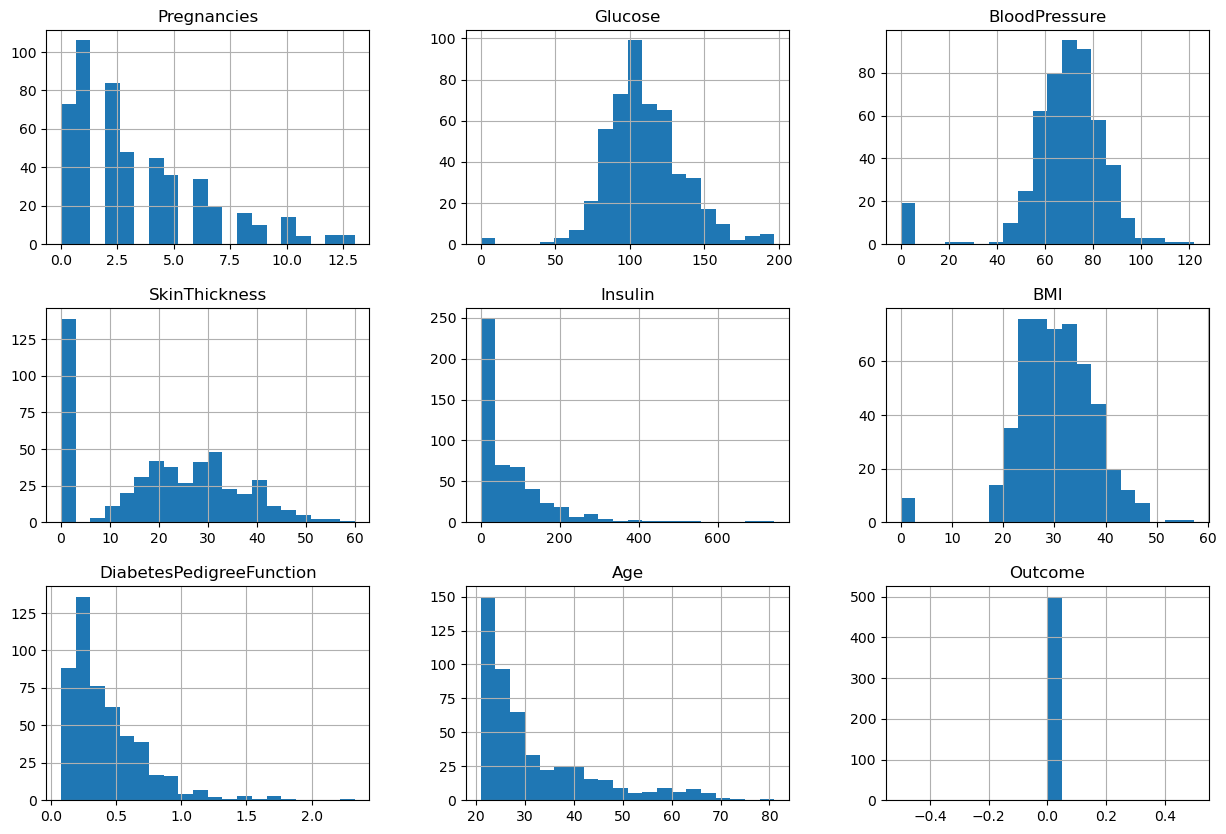

In [59]:
# histograms for predictor variables for individuals with diabetes
ds[ds['Outcome'] == 1].hist(bins=20, figsize=(15,10))
plt.show()

# histograms for predictor variables for individuals without diabetes
ds[ds['Outcome'] == 0].hist(bins=20, figsize=(15,10))
plt.show()

In [53]:
# average age of people in dataset
avg_age = ds['Age'].mean()
print (f'avg age: {avg_age}')
# average glucose level of people in dataset w/ and w/o diabetes
avg_glucose_diabetic = ds[ds['Outcome'] == 1]['Glucose'].mean()
avg_glucose_nondiabetic = ds[ds['Outcome'] == 0]['Glucose'].mean()
print(f'avg glucose - diabetic: {avg_glucose_diabetic}')
print(f'avg glucose - nondiabetic: {avg_glucose_nondiabetic}')
# average bmi of people in dataset w/ and w/o diabetes
avg_bmi_diabetic = ds[ds['Outcome'] == 1]['BMI'].mean()
avg_bmi_nondiabetic = ds[ds['Outcome'] == 0]['BMI'].mean()
print(f'avg bmi - diabetic: {avg_bmi_diabetic}')
print(f'avg bmi - nondiabetic: {avg_bmi_nondiabetic}')

avg age: 33.240885416666664
avg glucose - diabetic: 141.25746268656715
avg glucose - nondiabetic: 109.98
avg bmi - diabetic: 35.14253731343284
avg bmi - nondiabetic: 30.3042


# Part II : Preprocessing & Feature Engineering

You need to perform preprocessing on the given dataset. Please consider the following tasks and carry out the necessary steps accordingly.
- Handling missing values
- Handling outliers
- Scaling and normalization
- Feature Engineering
- Handling imbalanced data

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

# read csv
ds = pd.read_csv('diabetes.csv')
ds.info()
ds.describe()

# find nulls
null = ds.isnull().sum()

# remove nulls
ds = ds.dropna()

# save to csv
ds.to_csv('diabetes_clean.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


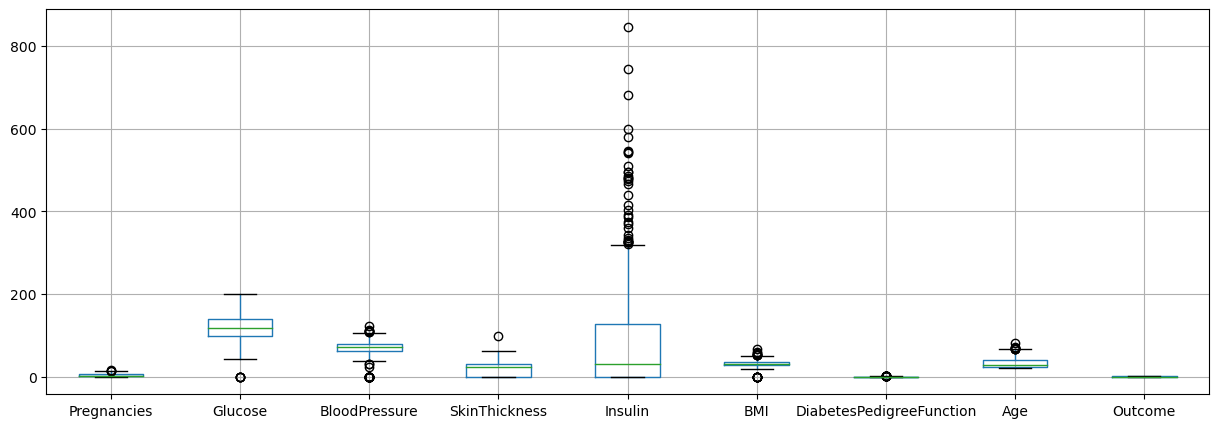

In [57]:
# outliers
ds.boxplot(figsize=(15,5))
plt.show()

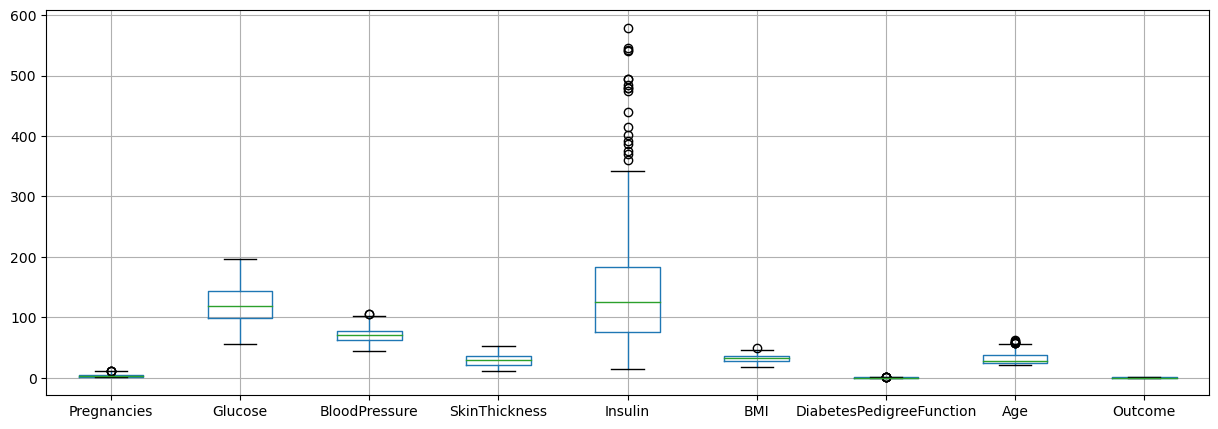

In [65]:
# remove outliers
ds = ds[ds['Pregnancies'] < 13]
ds = ds[ds['Glucose'] > 50]
ds = ds[ds['BloodPressure'] > 40]
ds = ds[ds['SkinThickness'] > 10]
ds = ds[ds['Insulin'] < 600]
ds = ds[ds['BMI'] < 50]
ds = ds[ds['DiabetesPedigreeFunction'] < 1.5]
ds = ds[ds['Age'] < 65]

ds.boxplot(figsize=(15,5))
plt.show()

In [67]:
# scaling data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
ds_scaled = pd.DataFrame(scaler.fit_transform(ds), columns=ds.columns)

ds_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-0.943908,-1.071183,-0.404030,-0.585787,-0.522023,-0.681867,-1.153460,-1.056199,-0.695164
1,-0.231958,-1.430350,-1.823286,0.306811,-0.578927,-0.201310,-0.870313,-0.541870,1.438509
2,-0.587933,2.455189,-0.049216,1.596119,3.736334,-0.284165,-1.184921,2.235506,1.438509
3,0.479992,1.442989,0.128191,-0.982497,0.246189,-1.062998,0.314709,2.029774,1.438509
4,-0.943908,-0.222241,-0.049216,0.108455,-0.503055,0.395243,0.111962,0.075324,1.438509
...,...,...,...,...,...,...,...,...,...
305,-0.943908,-0.026332,0.660412,1.001053,-0.711705,1.124364,-0.824870,-0.336139,-0.695164
306,-0.943908,0.202229,1.547446,1.001053,-0.370277,0.710091,1.957660,0.589653,1.438509
307,-0.587933,-1.103834,-1.113658,-0.288255,-1.261782,-0.632154,0.940429,-0.953333,-0.695164
308,2.259867,-0.679364,0.483005,1.893651,0.293609,0.113538,-1.139477,3.264163,-0.695164


In [88]:
# normalizing data
from sklearn.preprocessing import MinMaxScaler

min_max = MinMaxScaler()
ds_normalized = min_max.fit_transform(ds)
ds_normalized = pd.DataFrame(ds_normalized, columns=ds.columns)

ds_normalized

# save to csv
ds_normalized.to_csv('diabetes_normalized.csv', index=False)

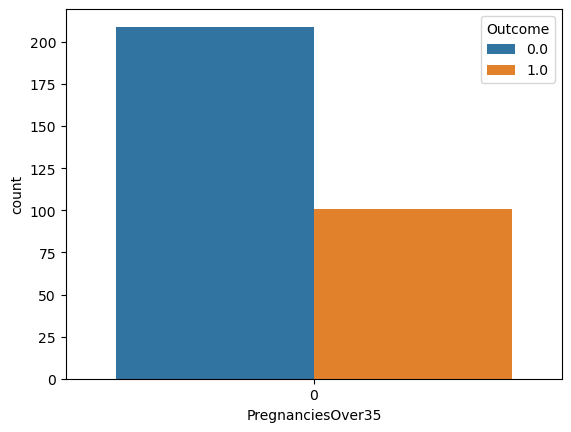

In [78]:
# feature engineering
df = pd.read_csv('diabetes_normalized.csv')
df['PregnanciesOver35'] = np.where(df['Pregnancies'] > 35, 1, 0)

# plot new feature vs outcome
sns.countplot(x='PregnanciesOver35', data=df, hue='Outcome')
plt.show()

# Part III : Training ML Model

For this task, you are required to build a machine learning model to predict the outcome variable. This will be a binary classification task, as the target variable is binary. You should select at least two models, one of which should be an ensemble model, and compare their performance.

- Train the models: Train the selected models on the training set.
- Model evaluation: Evaluate the trained models on the testing set using appropriate evaluation metrics, such as accuracy, precision, recall, F1-score, and ROC-AUC.
- Model comparison: Compare the performance of the selected models and choose the best-performing model based on the evaluation metrics. You can also perform additional analysis, such as model tuning and cross-validation, to improve the model's performance.

In [98]:
# train the classification model
import numpy as np
from sklearn.model_selection import train_test_split

# generate random data
x = np.random.normal(0,1,20).reshape(10,2)
y = np.random.normal(0,1,10)

# split data into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

print(x_train.shape)
print(x_test.shape)

(7, 2)
(3, 2)


In [90]:
# model evaluation - binary classifier

y_true = [0, 1, 1, 0, 1, 0, 1, 0, 1, 0]
y_prob = [0.1, 0.9, 0.8, 0.3, 0.5, 0.2, 0.9, 0.1, 0.7, 0.3]
thres = 0.5
y_pred = [1 if i > thres else 0 for i in y_prob]

In [96]:
# accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_true, y_pred)
accuracy

# f-1 score
from sklearn.metrics import f1_score

f1 = f1_score(y_true, y_pred)
f1 

# precision
from sklearn.metrics import precision_score

precision = precision_score(y_true, y_pred)
precision

# auc
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_true, y_prob)
auc

1.0

The scores for these metrics for this model are relatively high: 
accuracy = 0.9
f-1 = 0.888
precision = 1.0
auc = 1.0

In [121]:
# random forest ensemble method
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# load data
iris = load_iris()
x = iris.data
y = iris.target

rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# fit model
rfc.fit(x, y)

# probability
y_prob = rfc.predict_proba(x)

# predict
y_pred = rfc.predict(x)

In [122]:
# evaluating randomforest model
from sklearn.metrics import classification_report

print(classification_report(y, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



## Model Comparison

Based off evaluations metrics, the RandomForest model yielded better results than the binary classification model. 

# Part IV : Conclusion

From the machine learning models developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

- The random forest model was better suited for this data had higher results than the binary classifier model. 
- Glucose is the strongest predictor of diabetes.
- Being pregnant over the age of 35 does not increase your chances of getting diabetes. 
- Skin thickness and insulin have a moderately positive relationship, so the thicker your skin, the more insulin you would produce and vice versa. 